In [1]:
#### Based on lecture of LikeLion AI School ####

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
los, acc = [], []

def graph() :
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.set_title('Loss and Accuracy per Epochs')
    ax0.set_xlabel('epochs')
    ax0.plot(los, 'r-', label='loss')
    ax0.set_ylabel('loss')
    ax0.axis([0, epochs, 0, 1])
    ax0.grid(True)
    ax1.plot(acc, 'b-', label='accuracy')
    ax1.set_ylabel('accuracy')
    ax1.axis([0, epochs, 0, 1])
    ax1.grid(False)
    plt.legend(loc=2)
    plt.show()

In [3]:
data = np.loadtxt('C:/Users/Sunwoo/workspace/winequality-red2.csv', delimiter=';')
print(data)

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


In [4]:
x_data = data[:, 0:-1]    #fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol"
y_data = data[:, [-1]]    #"quality"
print(x_data)
print(y_data)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[[5.]
 [5.]
 [5.]
 ...
 [6.]
 [5.]
 [6.]]


In [5]:
#1 if y >= 7, 0 if y < 7
y_data = np.array([1 if i>=7 else 0 for i in y_data]).reshape(len(x_data), 1)
print(y_data)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [6]:
learning_rate = 0.01
epochs = 10000
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

X = tf.placeholder(tf.float64, shape=[None, 11])
Y = tf.placeholder(tf.float64, shape=[None, 1])

w1 = tf.Variable(tf.random_normal([11, 20], dtype=tf.float64))
b1 = tf.Variable(tf.random_normal([20], dtype=tf.float64))
layer1 = tf.sigmoid(tf.matmul(X, w1) + b1)    #hidden layer1

w2 = tf.Variable(tf.random_normal([20, 20], dtype=tf.float64))
b2 = tf.Variable(tf.random_normal([20], dtype=tf.float64))
layer2 = tf.sigmoid(tf.matmul(layer1, w2) + b2)    #hidden layer2

w3 = tf.Variable(tf.random_normal([20, 20], dtype=tf.float64))
b3 = tf.Variable(tf.random_normal([20], dtype=tf.float64))
layer3 = tf.sigmoid(tf.matmul(layer2, w3) + b3)    #hidden layer3

w4 = tf.Variable(tf.random_normal([20, 1], dtype=tf.float64))
b4 = tf.Variable(tf.random_normal([1], dtype=tf.float64))
hypothesis = tf.sigmoid(tf.matmul(layer3, w4) + b4)

#cost(H(x), y) = -(ylog(H(x)) + (1-y)log(1-H(x)))
loss = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float64)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float64))

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for step in range(epochs) :
        loss_, acc_, _ = sess.run([loss, accuracy, train], feed_dict={X:x_data, Y:y_data})
        los.append(loss_)
        acc.append(acc_)
        if step % 1000 == 0 :
            print("Epoch : %.f, loss : %.4f" % (step, loss_))
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis :", h, "\nPredicted :", p, "\nAccuracy :", a)

Epoch : 0, loss : 1.7576
Epoch : 1000, loss : 0.3879
Epoch : 2000, loss : 0.3774
Epoch : 3000, loss : 0.3694
Epoch : 4000, loss : 0.3660
Epoch : 5000, loss : 0.3636
Epoch : 6000, loss : 0.3617
Epoch : 7000, loss : 0.3600
Epoch : 8000, loss : 0.3581
Epoch : 9000, loss : 0.3561

Hypothesis : [[0.07102089]
 [0.0589331 ]
 [0.06179593]
 ...
 [0.22341108]
 [0.15119959]
 [0.16178775]] 
Predicted : [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 
Accuracy : 0.8642901813633521


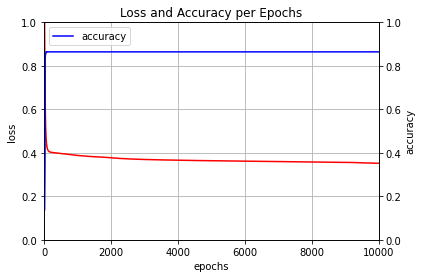

In [7]:
graph()